In [8]:
pip install astropy


Note: you may need to restart the kernel to use updated packages.


In [198]:
from astropy.io import votable

#  .vot file
vot_file = 'new_stars_data.vot'

# Uses astropy to parse the VOTable file
vot_data = votable.parse_single_table(vot_file)

# Convert the VOTable data to a pandas DataFrame
data_table = vot_data.to_table()

data_table.show_in_notebook()



idx,color,mg,mb,mr,parallax
,,,,,mas
0,2.3299713,9.071600266971082,10.146416970767469,7.816445657290906,10.671460519501066
1,2.54994,10.55836617267779,11.952018134958063,9.402078025705134,26.52101603144945
2,2.6535883,10.387688675318515,11.857439079676425,9.203850784693515,21.301049473275786
3,2.8912039,11.40429020907245,13.057250986355164,10.166047106045106,31.78038254817561
4,1.6580906,7.55356231088075,8.344855455106824,6.68676486367616,10.247156330160935
5,2.2889194,10.186590972402726,11.388455214956437,9.099535766103898,11.270989737393384
6,2.1433134,9.366426586065025,10.464932559880943,8.321619151982993,15.093936335971701
7,2.8420315,11.206953668855249,12.823363924287378,9.981332445405542,17.1820179063993
8,3.3686495,12.96660314814709,15.020459044143184,11.651809561416133,16.662600986563547


In [224]:
from astropy.io import votable
import pandas as pd
# vot file
vot_filenew = 'new_stars_data.vot'
# Use astropy to parse the VOTable file
vot_data = votable.parse_single_table(vot_file)

# Convert the VOTable data to a pandas DataFrame
data_table2 = vot_data.to_table()
data_table2.show_in_notebook()

# Convert Astropy Table to pandas DataFrame
df2 = data_table2.to_pandas()

# Originaly data had -- when no data so replaced with NaN
df2.replace('--', np.nan, inplace=True)

# Check for missing values
missing_values = df2.isnull().sum()
print("Missing values:")
print(missing_values)

# Get summary statistics
summary_stats = df2.describe()
print("\nSummary statistics:")
print(summary_stats)
# Remove rows with missing values
df2.dropna(inplace=True)
data_df2=df2
# Convert Astropy Table to pandas DataFrame
import pandas as pd
data_df2 = data_table.to_pandas()

# Remove rows with missing values
data_df2.dropna(inplace=True)
data_df2


Missing values:
color       6
mg          0
mb          6
mr          6
parallax    0
dtype: int64

Summary statistics:
            color          mg          mb          mr    parallax
count  841.000000  847.000000  841.000000  841.000000  847.000000
mean     2.334244    9.670487   10.943683    8.609439   15.835454
std      0.884282    2.645106    3.157220    2.424727    9.564869
min     -0.344347    0.421082    0.941906   -0.248525   10.002630
25%      1.808263    8.179233    9.114401    7.151088   11.102278
50%      2.547780   10.256972   11.616357    9.087337   12.847048
75%      2.956359   11.600002   13.245634   10.359769   17.146695
max      5.080926   15.278098   18.394328   14.240879  150.078109


,color,mg,mb,mr,parallax
0,2.329971,9.071600,10.146417,7.816446,10.671461
1,2.549940,10.558366,11.952018,9.402078,26.521016
2,2.653588,10.387689,11.857439,9.203851,21.301049
3,2.891204,11.404290,13.057251,10.166047,31.780383
4,1.658091,7.553562,8.344855,6.686765,10.247156
...,...,...,...,...,...
842,2.183365,11.875278,13.008329,10.824964,14.592254
843,1.058161,5.734165,6.181395,5.123234,14.623770
844,1.995164,8.131438,9.132453,7.137289,11.762695
845,2.643447,10.993871,12.454235,9.810788,10.142420


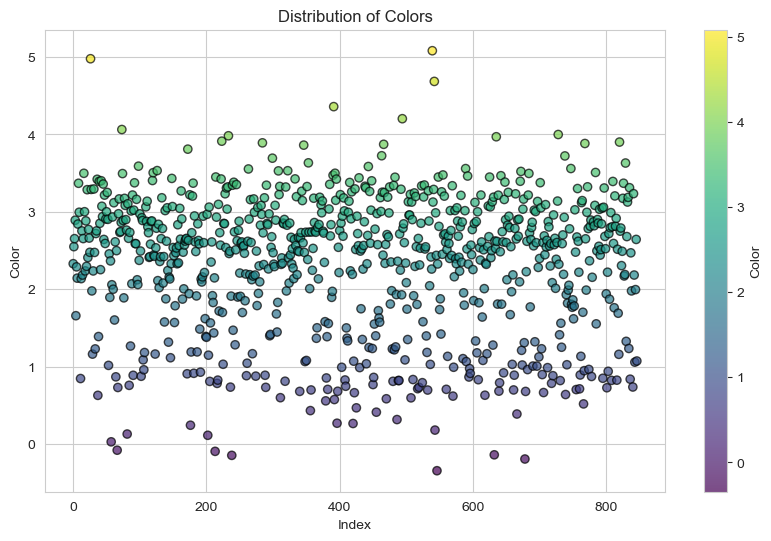

In [202]:
import matplotlib.pyplot as plt

# Extracting color values from the dataframe
colors = data_table['color']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(colors)), colors, c=colors, cmap='viridis', edgecolor='k', alpha=0.7)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Color')
plt.title('Distribution of Colors')

# Adding color bar
plt.colorbar(label='Color')

# Show plot
plt.show()


In [221]:
# Check for missing values in 'mr', 'mg', and 'mb' columns
missing_values_color = data_df2[['mr', 'mg', 'mb']].isnull().sum()

print("Missing values in color columns:")
print(missing_values_color)


Missing values in color columns:
mr    0
mg    0
mb    0
dtype: int64


In [223]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Define a threshold value for parallax to classify stars as bright or faint
parallax_threshold = 10.0  # Adjust this threshold based on your data

# Assign labels based on the threshold value
data_df2['brightness'] = data_df2['parallax'].apply(lambda x: 'faint' if x <= parallax_threshold else 'bright')

# Prepare features (X) and target (y)
X = data_df2[['color', 'parallax']]
y = data_df2['brightness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classification model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Use the trained model to predict the brightness of new stars

new_stars_data = {
    'color': [0.92, 0.7,0.324,0.532,.123],
    'parallax': [10.8, 12.6,4.32,7.32,1.00]
}
new_stars_df = pd.DataFrame(new_stars_data)
predicted_brightness = model.predict(new_stars_df)

print("Predicted brightness for new stars:", predicted_brightness)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'bright'

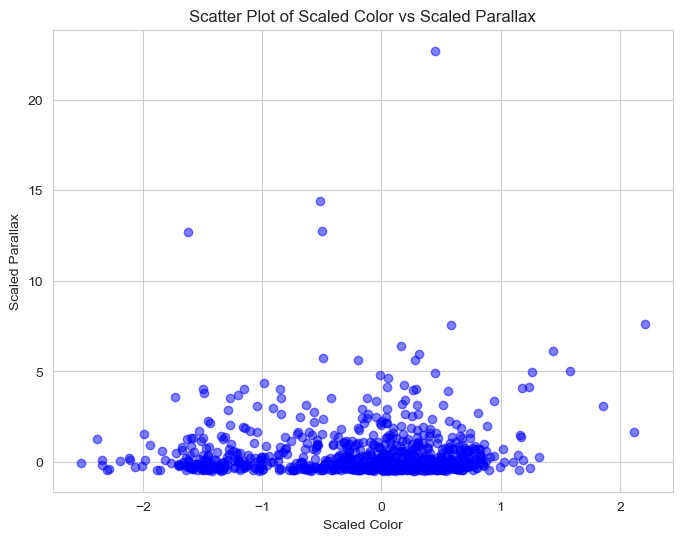

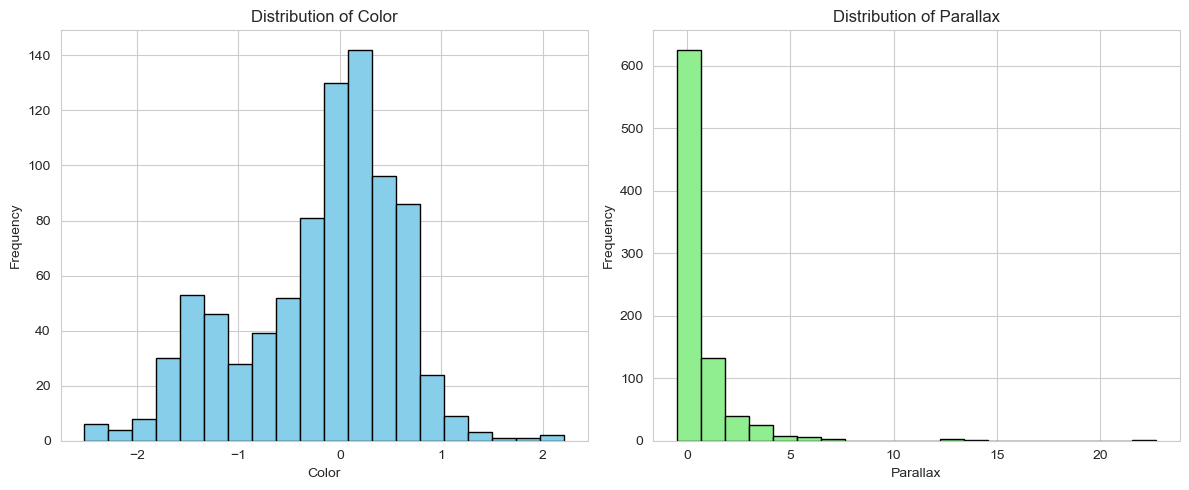

In [225]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Initialize Min-Max scaler
minmax_scaler = MinMaxScaler()

# Apply Min-Max scaling to 'color' and 'parallax' columns
df[['color', 'parallax']] = minmax_scaler.fit_transform(df[['color', 'parallax']])

# Initialize Robust scaler
robust_scaler = RobustScaler()

# Apply Robust scaling to 'color' and 'parallax' columns
df[['color', 'parallax']] = robust_scaler.fit_transform(df[['color', 'parallax']])
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['color'], df['parallax'], color='blue', alpha=0.5)
plt.xlabel('Scaled Color')
plt.ylabel('Scaled Parallax')
plt.title('Scatter Plot of Scaled Color vs Scaled Parallax')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['color'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Distribution of Color')

plt.subplot(1, 2, 2)
plt.hist(df['parallax'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Parallax')
plt.ylabel('Frequency')
plt.title('Distribution of Parallax')

plt.tight_layout()
plt.show()




C:\Users\beatr\AppData\Local\Temp\ipykernel_4688\795226948.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(i, parallax, c=[[mr, mg, mb]], cmap=cmap, marker='o', s=100)  # Passing a 2D array for color
C:\Users\beatr\AppData\Local\Temp\ipykernel_4688\795226948.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Color Scale')


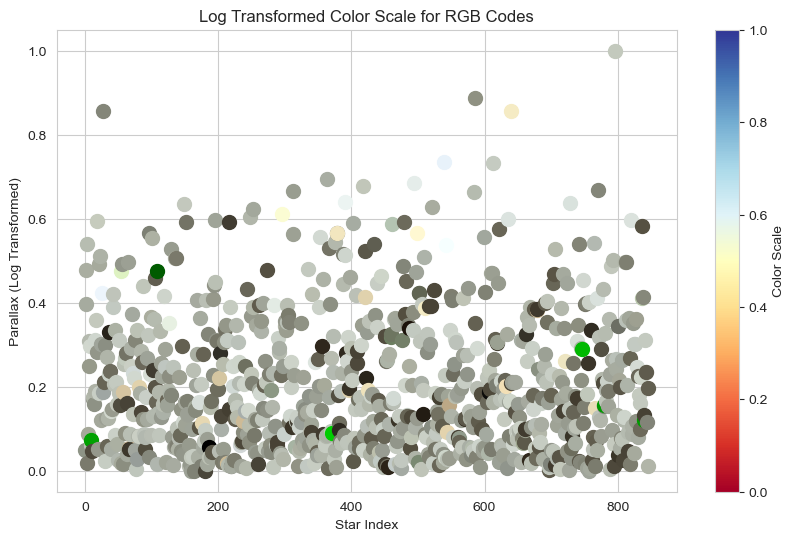

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Assuming df is your DataFrame containing the data
mr_values = df['mr']
mg_values = df['mg']
mb_values = df['mb']
parallax_values = df['parallax']

# Logarithmic transformation with different bases
mr_norm = (mr_values - mr_values.min()) / (mr_values.max() - mr_values.min())
mg_norm = (mg_values - mg_values.min()) / (mg_values.max() - mg_values.min())
mb_norm = (mb_values - mb_values.min()) / (mb_values.max() - mb_values.min())

base = 10  # You can try different bases (e.g., 10, np.e)

parallax_values_log = np.log(parallax_values + 1)  # Adding 1 to avoid log(0)

# Normalize the logarithmic transformed values between 0 and 1ues_log.min())
parallax_norm = (parallax_values_log - parallax_values_log.min()) / (parallax_values_log.max() - parallax_values_log.min())

# Choose a colormap
cmap = plt.get_cmap('RdYlBu')  # You can change this to 'RdYlBu' or any other colormap

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
for i, (mr, mg, mb, parallax) in enumerate(zip(mr_norm, mg_norm, mb_norm, parallax_norm)):
    plt.scatter(i, parallax, c=[[mr, mg, mb]], cmap=cmap, marker='o', s=100)  # Passing a 2D array for color

# Add color bar
sm = ScalarMappable(cmap=cmap, norm=Normalize(vmin=0, vmax=1))
plt.colorbar(sm, label='Color Scale')

plt.xlabel('Star Index')
plt.ylabel('Parallax (Log Transformed)')
plt.title('Log Transformed Color Scale for RGB Codes')

plt.show()

In [209]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

# Drop rows with missing values
data_df2.dropna(inplace=True)

# Define features and target variable
X = data_df2[['parallax', 'mg', 'mb', 'mr']]
y = data_df2['color']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'Mean Squared Error': mse, 'R-squared': r2}

# Display results
results_df = pd.DataFrame(results)
print(results_df)


                    Linear Regression  Decision Tree  Neural Network
Mean Squared Error       1.405304e-30       0.137824        0.023627
R-squared                1.000000e+00       0.852163        0.974656


color       0
mg          0
mb          0
mr          0
parallax    0
cluster     0
dtype: int64


C:\Users\beatr\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\beatr\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\beatr\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\beatr\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

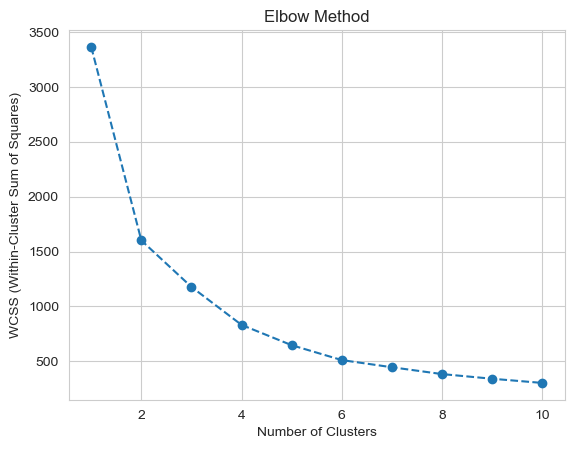

C:\Users\beatr\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\beatr\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\beatr\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\beatr\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

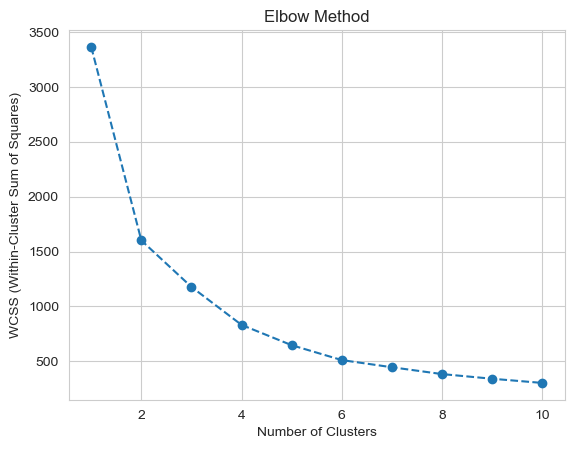

C:\Users\beatr\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


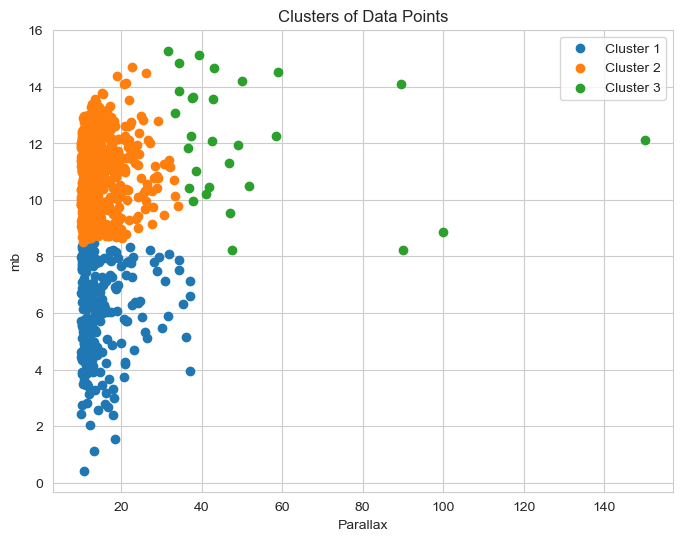

In [213]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


print(data_df2.isna().sum())
# Drop rows with missing values
data_df2.dropna(inplace=True)

# Select features for clustering
X = data_df2[['mg', 'mb', 'mr', 'parallax']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering (Elbow method and K-means)
# Rest of your clustering code here...

# Select features for clustering
X = data_df2[['mg', 'mb', 'mr', 'parallax']]
# Check for NaN or infinite values
if np.isnan(X_scaled).any() or np.isinf(X_scaled).any():
    # Handle NaN or infinite values
    print("Input data contains NaN or infinite values. Please handle them before clustering.")
else:
    # Determine the optimal number of clusters using the Elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow method graph
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.show()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters and perform K-means clustering
k = 3  # Example: choose the optimal number of clusters based on the Elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
data_df2['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = data_df2[data_df2['cluster'] == cluster]
    plt.scatter(cluster_data['parallax'], cluster_data['mg'], label=f'Cluster {cluster+1}')

plt.title('Clusters of Data Points')
plt.xlabel('Parallax')
plt.ylabel('mb')
plt.legend()
plt.show()
